In [1]:
import os
import numpy as np
from tqdm import tqdm
import PIL.Image as pi
from shutil import move
import tensorflow as tf
from pathlib import Path
from random import shuffle
import matplotlib.pyplot as plt
from skimage.transform import resize
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

In [ ]:
data_path = Path("Data/COVID XR-V2")
test_path = Path("Data/Test")
for fld in os.listdir(data_path):
    fld_path = data_path / fld
    # os.mkdir(test_path / fld)
    files = os.listdir(fld_path)
    shuffle(files)
    for file in tqdm(files[:125]):
        file_path = fld_path / file
        dest_path = test_path / fld / file
        # print(file_path, dest_path, sep="\n")
        move(file_path, dest_path)

In [3]:
test_path = Path("Data/Test")
train_path = Path("Data/Train")

In [4]:
datagen = image.ImageDataGenerator(rescale=1/255.)

In [18]:
print("TRAINING")
train_gen = datagen.flow_from_directory(train_path, batch_size=128, shuffle=True, seed=42, class_mode="categorical", target_size=[150, 150])
print("TESTING")
test_gen = datagen.flow_from_directory(test_path, batch_size=128, class_mode="categorical", target_size=[150, 150])

TRAINING
Found 29498 images belonging to 4 classes.
TESTING
Found 500 images belonging to 4 classes.


In [ ]:
x, y = next(train_gen)
x.shape, y.shape

In [14]:
model = Sequential([
    layers.Input(shape=[150, 150, 3]),

    layers.Conv2D(16, kernel_size=3, strides=2, padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=2),

    layers.Conv2D(32, kernel_size=3, padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=2),

    layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=2),
    #
    # layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),
    # layers.MaxPooling2D(pool_size=2),

    layers.Flatten(),

    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(4, activation="softmax")

], name="Brain_Tumor_Classifier")

model.summary()

Model: "Brain_Tumor_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 75, 75, 16)        448       
                                                                 
 batch_normalization_6 (Batc  (None, 75, 75, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 37, 37, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 37, 37, 32)        4640      
                                                                 
 batch_normalization_7 (Batc  (None, 37, 37, 32)       128       
 hNormalization)                                                 
                                            

In [15]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

In [ ]:
history = model.fit(train_gen, epochs=5, validation_data=test_gen, verbose=0)

LOSS


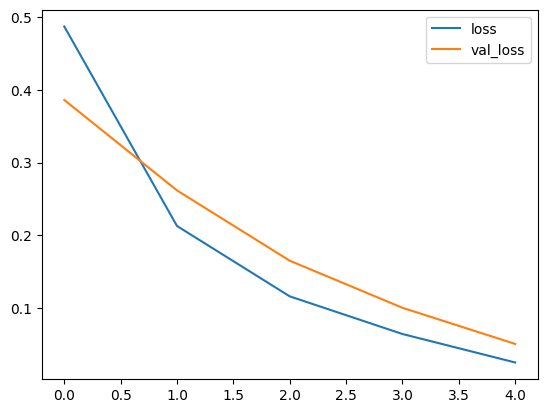

ACCURACY


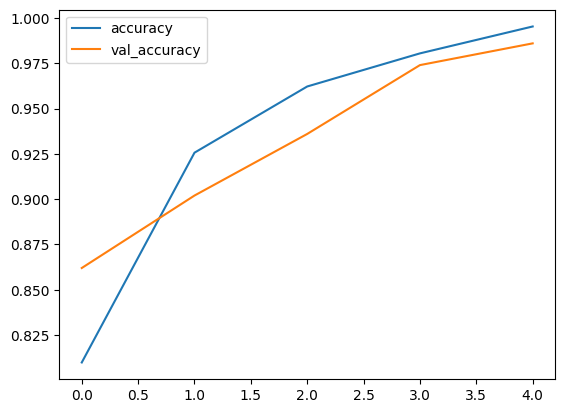

In [22]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
rng = [i for i in range(len(loss))]
print("LOSS")
plt.plot(rng, loss, label="loss")
plt.plot(rng, val_loss, label="val_loss")
plt.legend()
plt.show()
print("ACCURACY")
plt.plot(rng, acc, label="accuracy")
plt.plot(rng, val_acc, label="val_accuracy")
plt.legend()
plt.show()

In [ ]:
model.save("Models/Project-4 Covid XR v2.h5")

In [ ]:
loss, acc = model.evaluate(test_gen, verbose=0)
print("Accuracy : %.2f" % (acc*100))
print("Loss     : %.3f" % loss)

Accuracy : 99.40
Loss     : 0.019
